<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 146.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 170.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 148.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 127.6 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here
# Display the first few rows of the dataframe
df.head()

# Check for missing values in each column
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_info.sort_values(by='Percentage', ascending=False)

# Handle missing values in the 'Employment' column (drop rows with missing values)
df = df.dropna(subset=['Employment'])

# Handle missing values in the 'JobSat' column (fill with the most frequent value)
df['JobSat'] = df['JobSat'].fillna(df['JobSat'].mode()[0])

# Handle missing values in the 'RemoteWork' column (fill with the most frequent value)
df['RemoteWork'] = df['RemoteWork'].fillna(df['RemoteWork'].mode()[0])

# Verify that missing values have been handled
missing_values_after = df.isnull().sum()
missing_info_after = pd.DataFrame({'Missing Values': missing_values_after, 'Percentage': (missing_values_after / len(df)) * 100})
missing_info_after.sort_values(by='Percentage', ascending=False)



,Missing Values,Percentage
AINextMuch less integrated,64289,98.245641
AINextLess integrated,63082,96.401119
AINextNo change,52939,80.900714
AINextMuch more integrated,51999,79.464217
EmbeddedAdmired,48704,74.428840
...,...,...
ResponseId,0,0.000000
RemoteWork,0,0.000000
Check,0,0.000000
MainBranch,0,0.000000


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


/tmp/ipykernel_130/843088972.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_job_sat = df.groupby('ExperienceRange')['JobSat'].median().reset_index()
/tmp/ipykernel_130/843088972.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ExperienceRange', y='JobSat', data=median_job_sat, palette='viridis')


  ExperienceRange  JobSat
0       0-5 years     8.0
1      5-10 years     8.0
2     10-20 years     8.0
3       >20 years     8.0


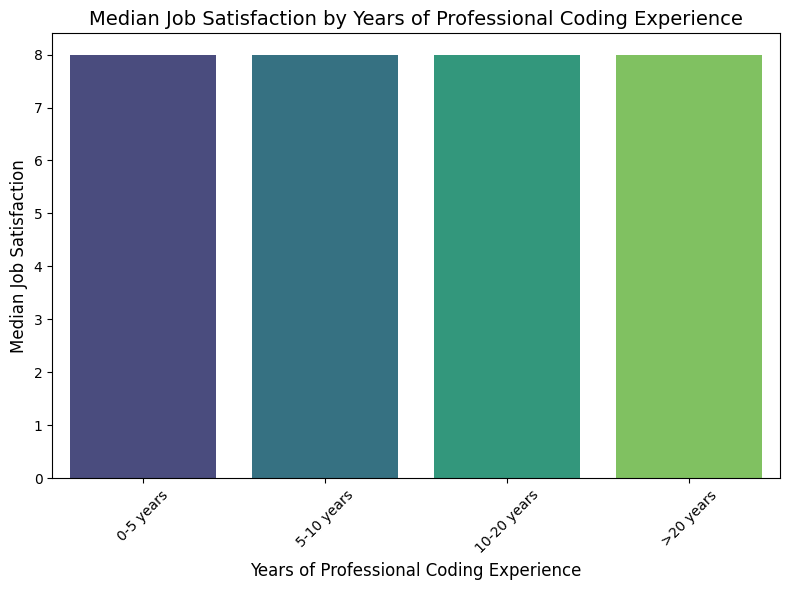

In [5]:
## Write your code here
# Convert 'YearsCodePro' to numeric, forcing errors to NaN (in case of non-numeric values)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows with NaN values in critical columns
df = df.dropna(subset=['YearsCodePro', 'JobSat'])

# Create experience ranges based on YearsCodePro
bins = [0, 5, 10, 20, float('inf')]  # Defining experience ranges: 0-5, 5-10, 10-20, >20 years
labels = ['0-5 years', '5-10 years', '10-20 years', '>20 years']  # Labels for the bins

# Assign experience range to a new column 'ExperienceRange'
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Calculate median JobSat for each experience range
median_job_sat = df.groupby('ExperienceRange')['JobSat'].median().reset_index()

# Display the median job satisfaction for each experience range
print(median_job_sat)

# Visualize the relationship between YearsCodePro ranges and median JobSat using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='ExperienceRange', y='JobSat', data=median_job_sat, palette='viridis')

# Set plot labels and title
plt.xlabel('Years of Professional Coding Experience', fontsize=12)
plt.ylabel('Median Job Satisfaction', fontsize=12)
plt.title('Median Job Satisfaction by Years of Professional Coding Experience', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_130/3862395026.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='JobSat', data=df, palette='viridis')


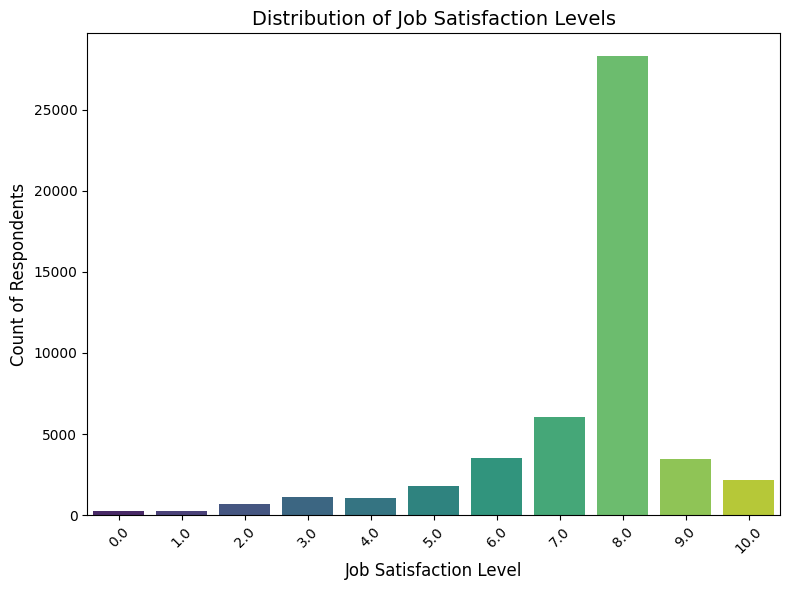

In [6]:
## Write your code here
# Clean data: Drop rows where JobSat is NaN (or handle missing values in another way)
df = df.dropna(subset=['JobSat'])

# Visualize the distribution of JobSat values using a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='JobSat', data=df, palette='viridis')

# Set plot labels and title
plt.xlabel('Job Satisfaction Level', fontsize=12)
plt.ylabel('Count of Respondents', fontsize=12)
plt.title('Distribution of Job Satisfaction Levels', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


#### Step 6: Analyzing Remote Work Preferences by Job Role


Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly',
       'JobSat', 'ExperienceRange'],
      dtype='object', length=115)


/tmp/ipykernel_130/3798855542.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RemoteWork', data=df, palette='viridis')


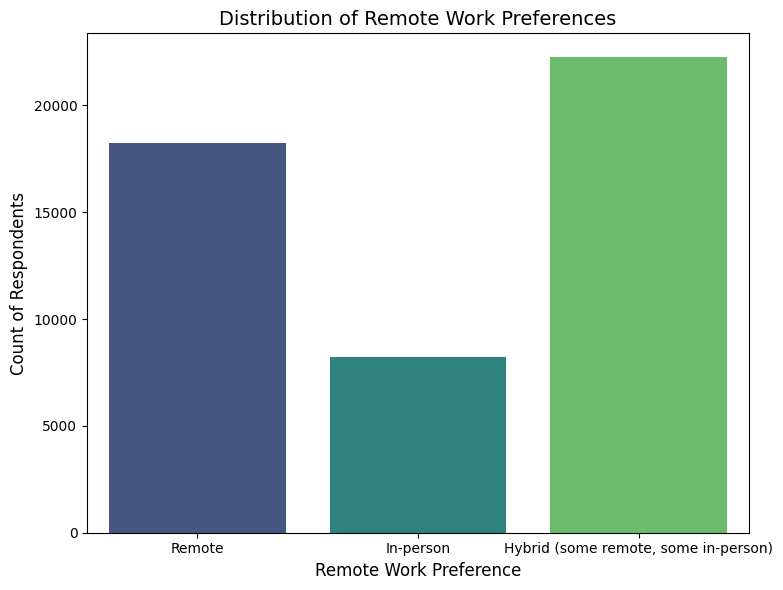

['Employed, full-time'
 'Independent contractor, freelancer, or self-employed'
 'Employed, full-time;Student, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed'
 'Student, full-time' 'Employed, full-time;Student, full-time'
 'Employed, part-time' 'Student, full-time;Employed, part-time'
 'Student, part-time;Employed, part-time'
 'Not employed, but looking for work'
 'Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time'
 'Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Student, part-time'
 'Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time'
 'Not employed, and not looking for work'
 'Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed'
 'Student, full-time;Independent contract

KeyError: 'Role'

In [9]:
## Write your code here
# Clean data: Drop rows with missing values in 'RemoteWork' or 'Employment'
df = df.dropna(subset=['RemoteWork', 'Employment'])

# Check the column names
print(df.columns)  # Check for the correct name of the job role column

# Assuming the job role column is named 'Role' or something similar
# 1. Count plot to show the distribution of RemoteWork preferences across all job roles
plt.figure(figsize=(8, 6))
sns.countplot(x='RemoteWork', data=df, palette='viridis')

# Set plot labels and title
plt.xlabel('Remote Work Preference', fontsize=12)
plt.ylabel('Count of Respondents', fontsize=12)
plt.title('Distribution of Remote Work Preferences', fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()

# 2. Cross-tabulate remote work preferences by Employment type and Job role (adjust column name here)
# First, check the unique values in 'Employment' and the corrected 'Role' column
print(df['Employment'].unique())
print(df['Role'].unique())  # Use the correct column name for job role

# Cross-tabulate RemoteWork by Employment type and Job role
remote_by_employment_role = pd.crosstab(index=[df['Employment'], df['Role']], columns=df['RemoteWork'], margins=True)

# Display the cross-tabulation result
print(remote_by_employment_role)

# Check the column names to find the correct one for Job Role
print(df.columns)


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly',
       'JobSat', 'ExperienceRange'],
      dtype='object', length=115)
    ResponseId                                         MainBranch  \
1            2                     I am a developer by profession   
2            3                     I am a developer by profession   
6            7  I am not primarily a developer, but I write co...   
9           10                     I am a developer by profession   
11          12                     I am a developer by profession   

                Age                                         Employment  \
1   35-44 years old                                Employed, full-time   
2   45-54 years old                            

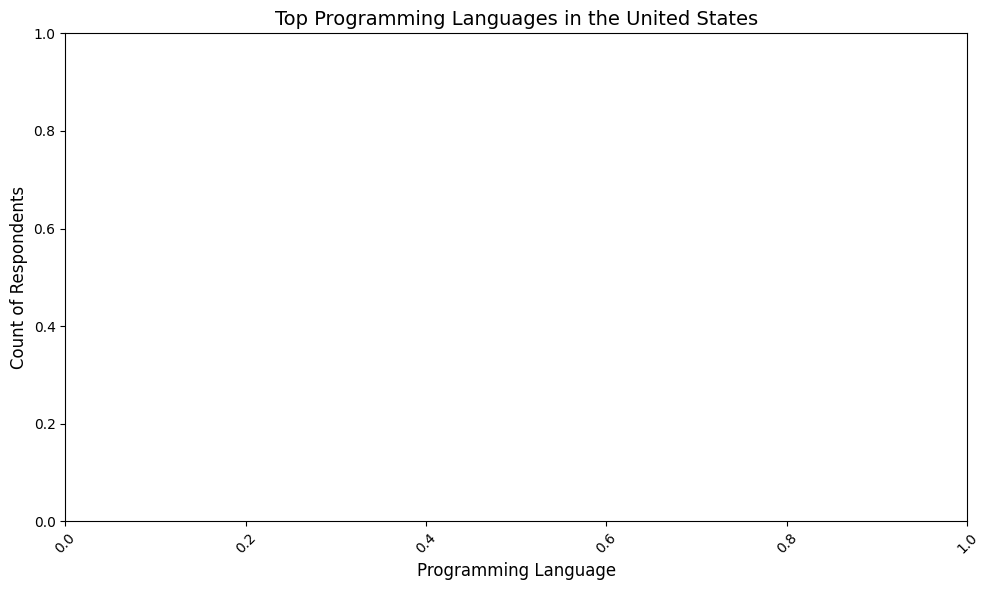

/tmp/ipykernel_130/3633957747.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grouped['Languages'] = df_grouped['LanguageHaveWorkedWith'].str.split(';')


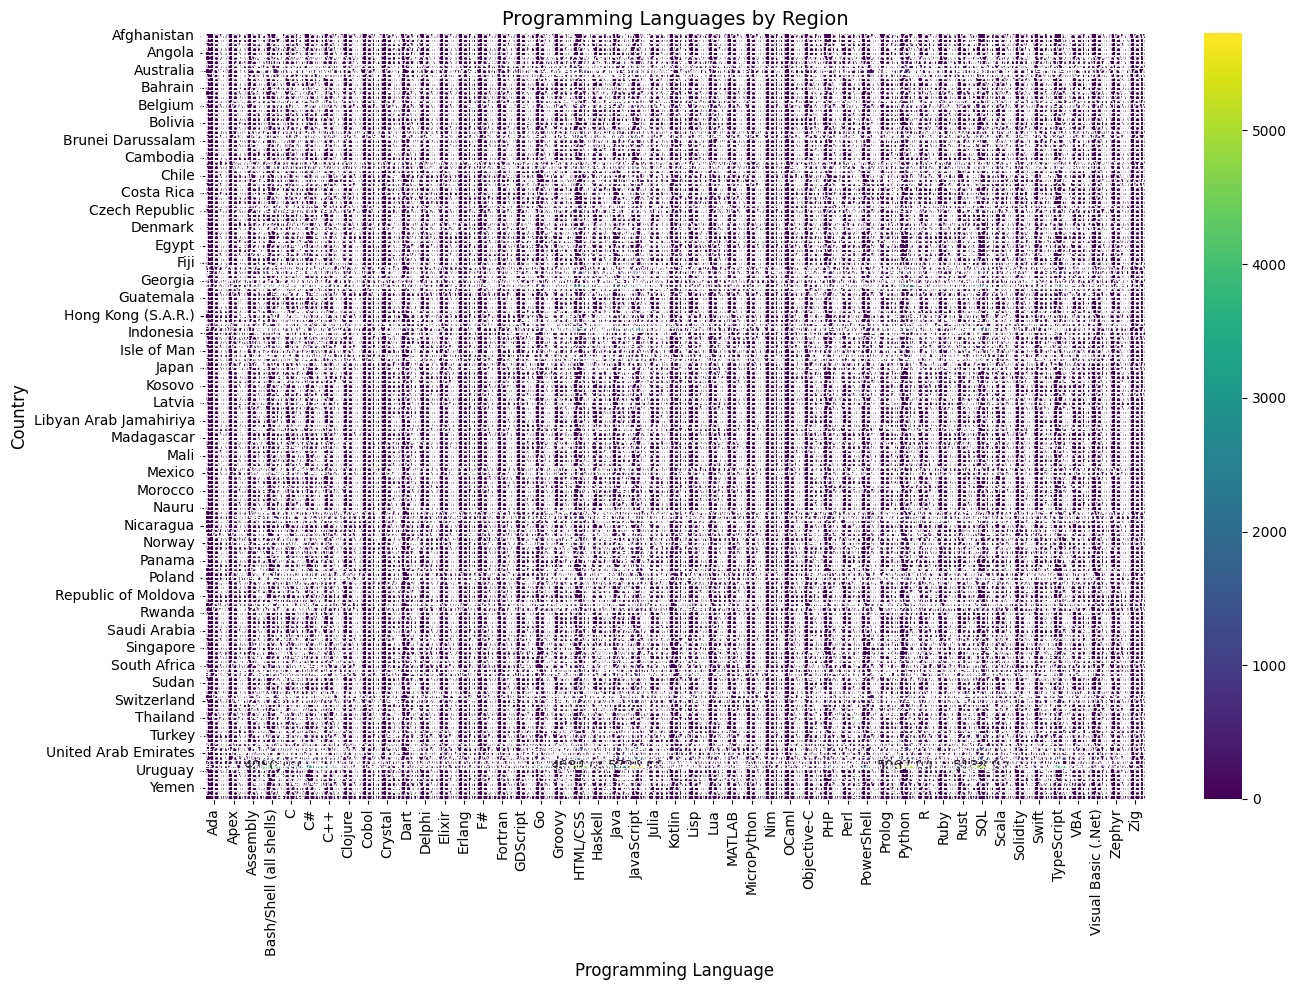

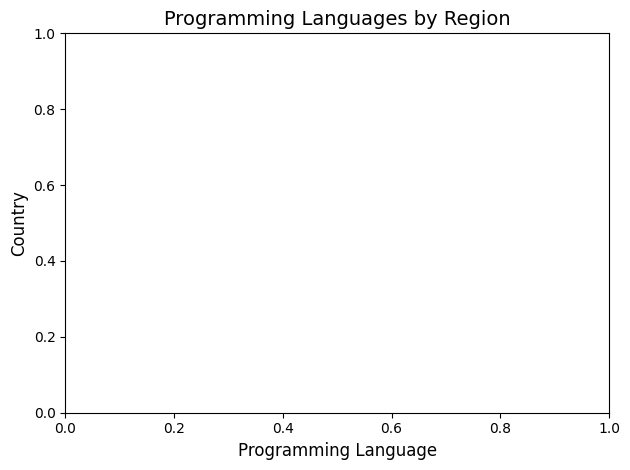

In [11]:
## Write your code here
abs# Check the column names and a sample of the data
print(df.columns)
print(df.head())

# Check for regions or country-related columns
print(df['Country'].unique())  # Check unique countries/regions if the column exists

# Filter the data for a specific region or country
# For example, let's filter for respondents from the United States
df_us = df[df['Country'] == 'United States']

# Check if 'LanguageHaveWorkedWith' contains the languages they worked with
print(df_us['LanguageHaveWorkedWith'].head()) 

# Split the 'LanguageHaveWorkedWith' column to get a list of languages for each respondent
df_us['Languages'] = df_us['LanguageHaveWorkedWith'].str.split(';')

# Flatten the list of languages for counting occurrences
languages_us = df_us['Languages'].explode().value_counts()

# Display the top 10 most popular languages in the US
print(languages_us.head(10))

# Visualize the top languages with a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=languages_us.index, y=languages_us.values, palette='viridis')

# Set plot labels and title
plt.xlabel('Programming Language', fontsize=12)
plt.ylabel('Count of Respondents', fontsize=12)
plt.title('Top Programming Languages in the United States', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
# Group by country/region and analyze the top languages
df_grouped = df.dropna(subset=['LanguageHaveWorkedWith', 'Country'])

# Split the languages and count them by region
df_grouped['Languages'] = df_grouped['LanguageHaveWorkedWith'].str.split(';')
languages_by_region = df_grouped.explode('Languages')

# Count languages by region
language_counts_by_region = languages_by_region.groupby(['Country', 'Languages']).size().reset_index(name='Count')

# Pivot for heatmap visualization
language_pivot = language_counts_by_region.pivot(index='Country', columns='Languages', values='Count').fillna(0)

# Visualize using a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(language_pivot, cmap='viridis', annot=True, fmt='.2f', linewidths=.5)  # Use '.2f' for float formatting

# Set plot labels and title
plt.xlabel('Programming Language', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Programming Languages by Region', fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()

# Set plot labels and title
plt.xlabel('Programming Language', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Programming Languages by Region', fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)
YearsCodePro      13827
JobSatPoints_1    36113
dtype: int64


/tmp/ipykernel_130/3260131827.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['YearsCodePro'] = pd.to_numeric(df_clean['YearsCodePro'], errors='coerce')
/tmp/ipykernel_130/3260131827.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['JobSatPoints_1'] = pd.to_numeric(df_clean['JobSatPoints_1'], errors='coerce')


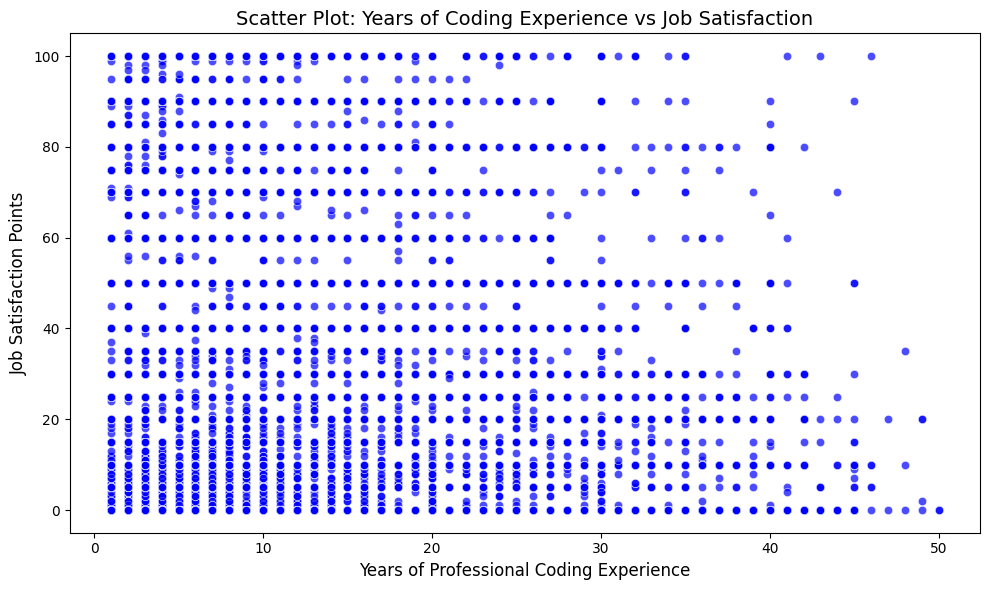

Correlation between Years of Coding Experience and Job Satisfaction: -0.03


In [12]:
## Write your code here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Check the column names to ensure 'YearsCodePro' and 'JobSatPoints_1' exist
print(df.columns)

# Check for any missing values in the relevant columns
print(df[['YearsCodePro', 'JobSatPoints_1']].isnull().sum())

# Drop rows with missing values in the relevant columns
df_clean = df.dropna(subset=['YearsCodePro', 'JobSatPoints_1'])

# Convert 'YearsCodePro' and 'JobSatPoints_1' to numeric if necessary (in case they are not already)
df_clean['YearsCodePro'] = pd.to_numeric(df_clean['YearsCodePro'], errors='coerce')
df_clean['JobSatPoints_1'] = pd.to_numeric(df_clean['JobSatPoints_1'], errors='coerce')

# Drop any remaining rows with NaN values after conversion
df_clean = df_clean.dropna(subset=['YearsCodePro', 'JobSatPoints_1'])

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsCodePro', y='JobSatPoints_1', data=df_clean, color='blue', alpha=0.7)

# Set plot labels and title
plt.xlabel('Years of Professional Coding Experience', fontsize=12)
plt.ylabel('Job Satisfaction Points', fontsize=12)
plt.title('Scatter Plot: Years of Coding Experience vs Job Satisfaction', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


# Calculate the Pearson correlation coefficient
correlation = df_clean[['YearsCodePro', 'JobSatPoints_1']].corr().iloc[0, 1]
print(f'Correlation between Years of Coding Experience and Job Satisfaction: {correlation:.2f}')


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)
Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                1059   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      16806   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   11011   
Primary/elementary school                                           160   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     2073   
Secondary school (e.g. American high school, Ge...                 1460   
Some colleg

/tmp/ipykernel_130/2550722169.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


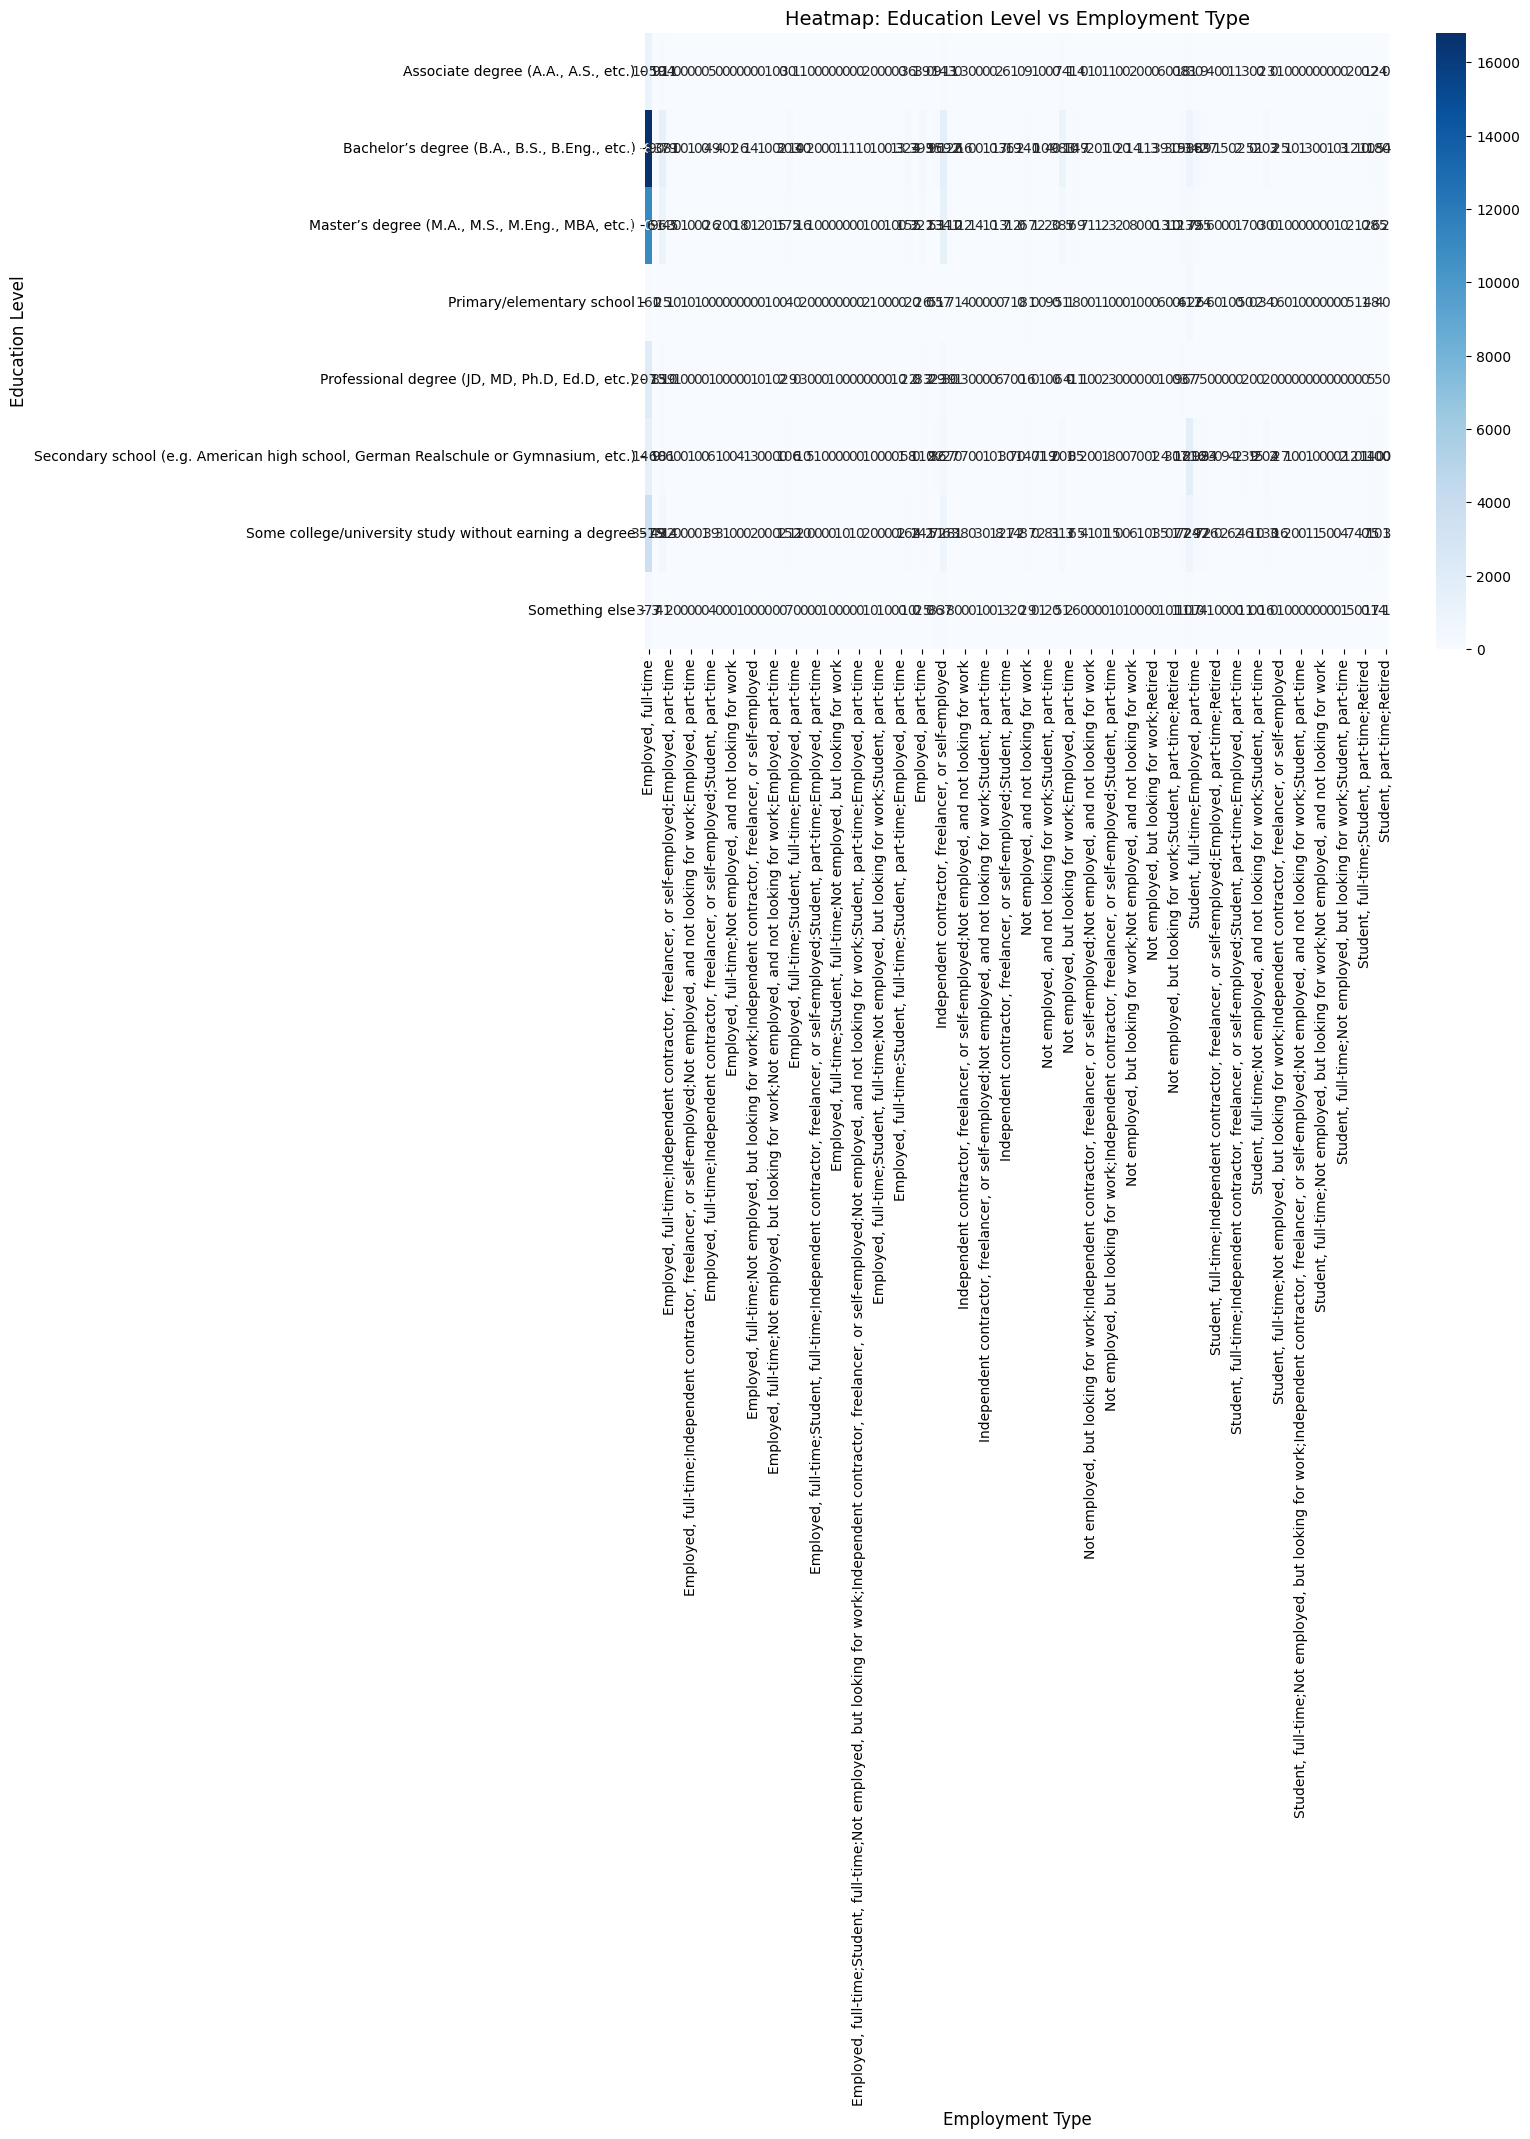

/tmp/ipykernel_130/2550722169.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


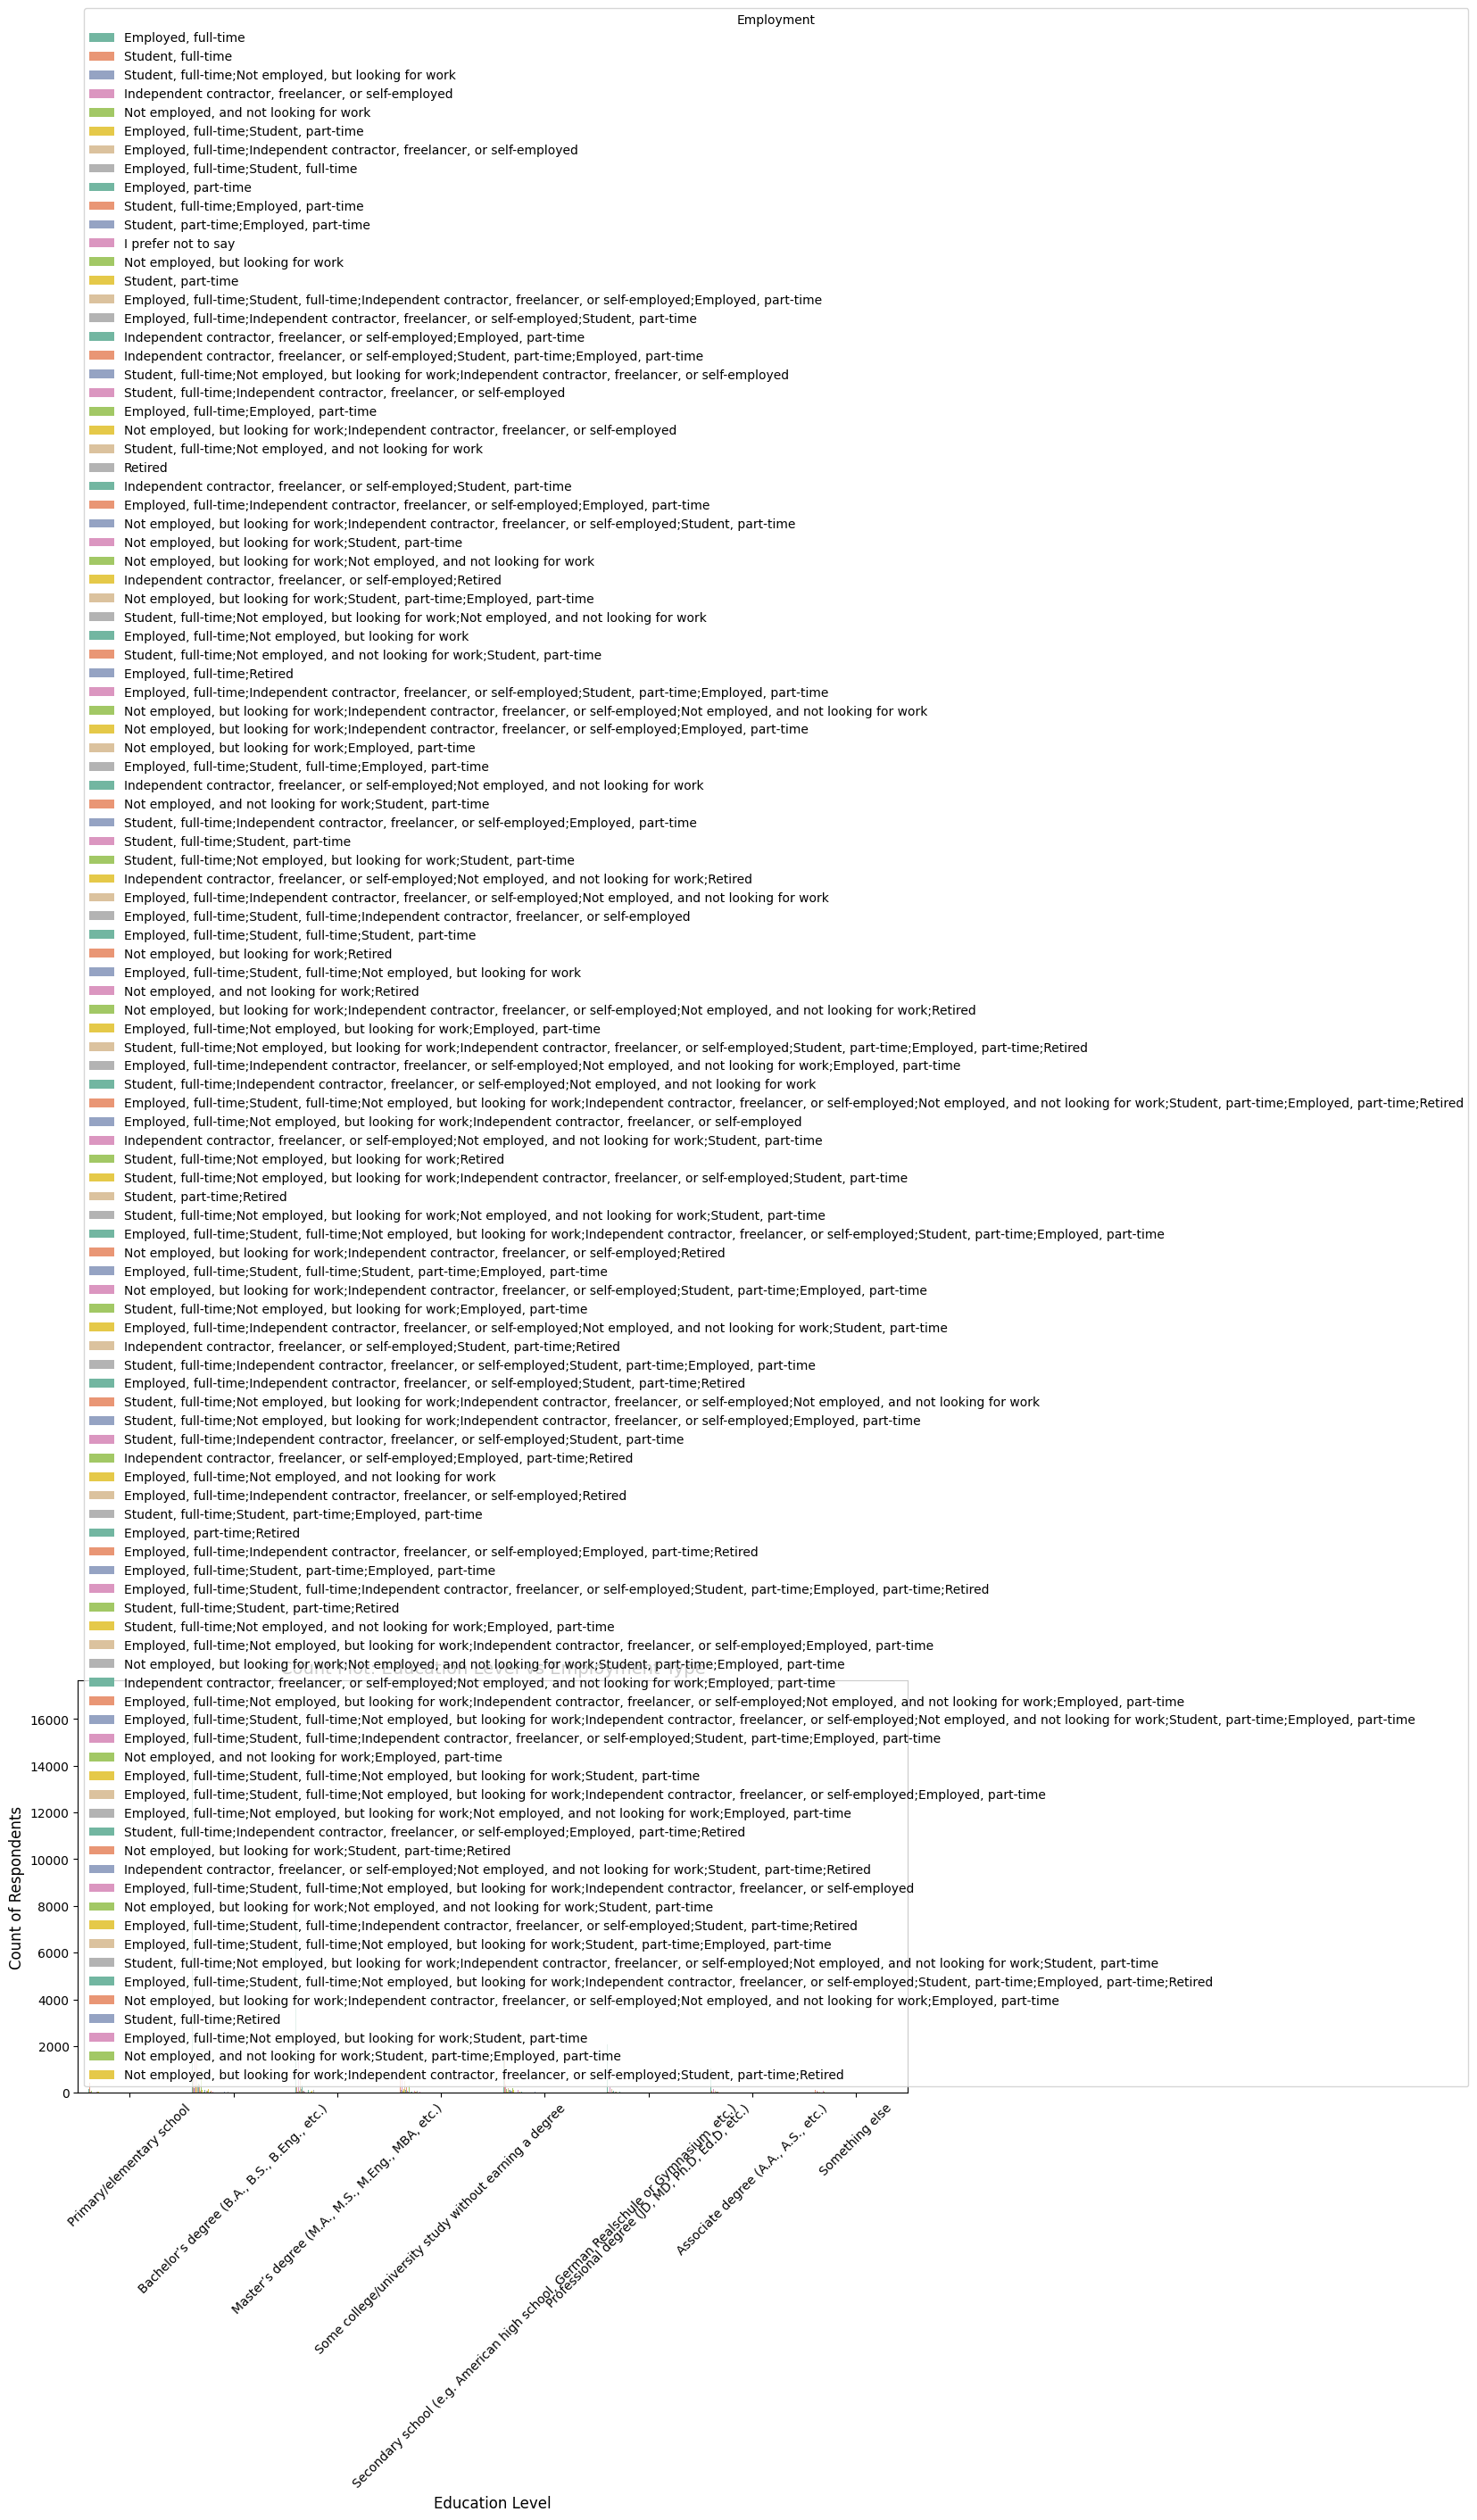

In [13]:


# Check if 'EdLevel' and 'Employment' columns exist
print(df.columns)

# Generate cross-tabulation of Education Level vs Employment Type
cross_tab = pd.crosstab(df['EdLevel'], df['Employment'], margins=True, margins_name="Total")

# Display the cross-tabulation
print(cross_tab)

# Create a heatmap to visualize the cross-tabulation
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab.iloc[:-1, :-1], annot=True, fmt='d', cmap='Blues', cbar=True)

# Set plot labels and title
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Education Level', fontsize=12)
plt.title('Heatmap: Education Level vs Employment Type', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

# Count plot for Education Level vs Employment Type
plt.figure(figsize=(12, 6))
sns.countplot(x='EdLevel', hue='Employment', data=df, palette='Set2')

# Set plot labels and title
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Count of Respondents', fontsize=12)
plt.title('Count Plot: Education Level vs Employment Type', fontsize=14)

# Show the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()



#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
## Write your code here

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
